In [3]:
from env import get_db_url
import pandas as pd 
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm


In [4]:
sql_query = '''SELECT *
FROM species
JOIN measurements using(species_id)'''

df = pd.read_sql(sql_query, get_db_url('iris_db'))

In [7]:
# designate features to create clusters with
X = df[['petal_width', 'sepal_width']]

In [8]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

kmeans.predict(X)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [14]:
df['cluster'] = kmeans.predict(X)

In [15]:
# cluster centers 
kmeans.cluster_centers_


array([[2.05208333, 3.04166667],
       [0.24489796, 3.45102041],
       [1.30943396, 2.70754717]])

In [16]:
# average values of each feature for each cluster 
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
centroids

,petal_width,sepal_width
0,2.052083,3.041667
1,0.244898,3.451020
2,1.309434,2.707547


In [17]:
df.groupby('cluster')['petal_width', 'sepal_width'].mean()


/var/folders/f1/m4_s2k_97xng0khbnvxb1jbw0000gn/T/ipykernel_8015/2571198500.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('cluster')['petal_width', 'sepal_width'].mean()


,petal_width,sepal_width
cluster,,
0,2.052083,3.041667
1,0.244898,3.451020
2,1.309434,2.707547


Text(0.5, 1.0, 'Visualizing Cluster Centers')

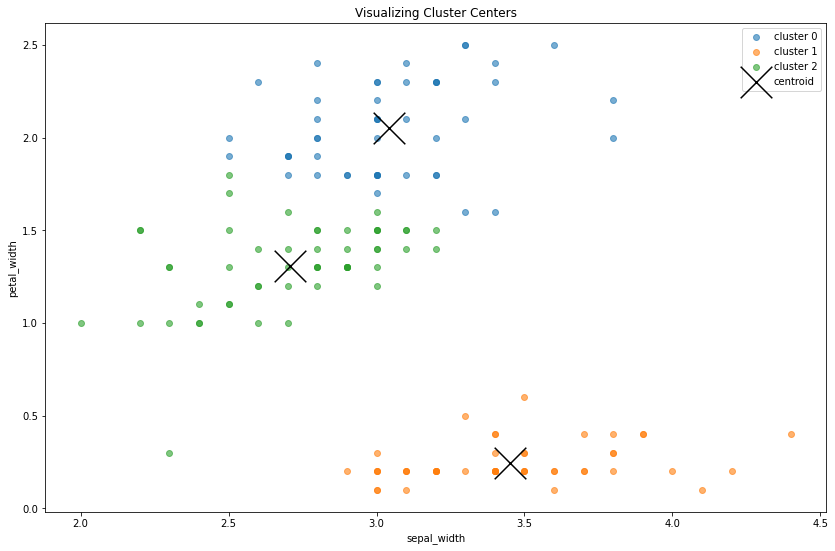

In [18]:
# visualize clusters 

plt.figure(figsize=(14, 9))

for cluster, subset in df.groupby('cluster'):
    plt.scatter(subset.sepal_width, subset.petal_width, label='cluster ' + str(cluster), alpha=.6)

centroids.plot.scatter(y='petal_width', x='sepal_width', c='black', marker='x', s=1000, ax=plt.gca(), label='centroid')

plt.legend()
plt.xlabel('sepal_width')
plt.ylabel('petal_width')
plt.title('Visualizing Cluster Centers')


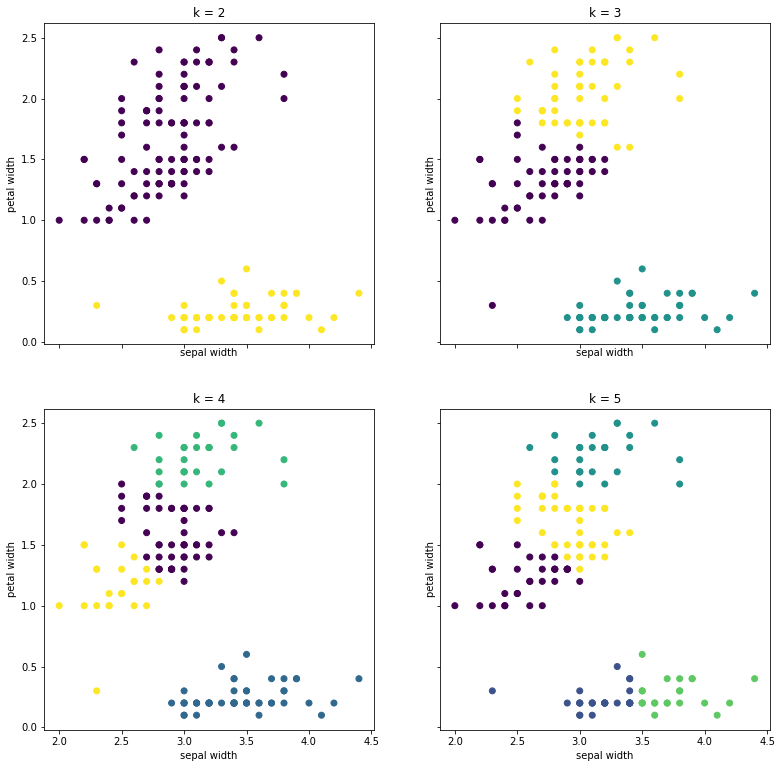

In [21]:
# visualize Ks 
fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k).fit(X).predict(X)
    ax.scatter(X.sepal_width, X.petal_width, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='sepal width', ylabel='petal width')


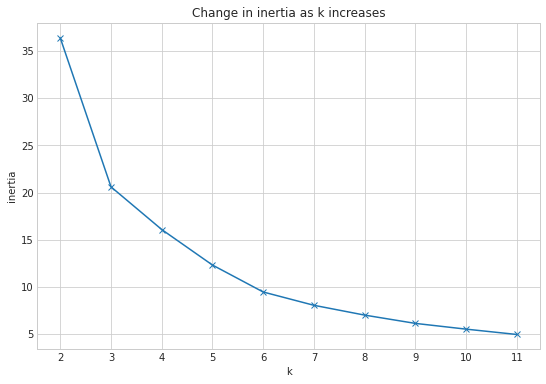

In [19]:
# elbow method 
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   species_id      150 non-null    int64  
 1   species_name    150 non-null    object 
 2   measurement_id  150 non-null    int64  
 3   sepal_length    150 non-null    float64
 4   sepal_width     150 non-null    float64
 5   petal_length    150 non-null    float64
 6   petal_width     150 non-null    float64
 7   cluster         150 non-null    int32  
dtypes: float64(4), int32(1), int64(2), object(1)
memory usage: 8.9+ KB


In [33]:
# creating column petal area 
df['petal_area'] = df['petal_length']*df['petal_width']

In [34]:
# creating column sepal area 

df['sepal_area'] = df['sepal_length']*df['sepal_width']

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   species_id      150 non-null    int64  
 1   species_name    150 non-null    object 
 2   measurement_id  150 non-null    int64  
 3   sepal_length    150 non-null    float64
 4   sepal_width     150 non-null    float64
 5   petal_length    150 non-null    float64
 6   petal_width     150 non-null    float64
 7   cluster         150 non-null    int32  
 8   petal_area      150 non-null    float64
 9   sepal_area      150 non-null    float64
dtypes: float64(6), int32(1), int64(2), object(1)
memory usage: 11.3+ KB


In [37]:
# designate features to create clusters with
X = df[['petal_area', 'sepal_area','petal_width']]

In [38]:
# fit k means onto features and create predictions
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

kmeans.predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0,
       0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

In [39]:
df['cluster2'] = kmeans.predict(X)

In [40]:
kmeans.cluster_centers_

array([[11.86394737, 21.33052632,  2.07894737],
       [ 0.3656    , 17.2578    ,  0.246     ],
       [ 6.4516129 , 16.12870968,  1.42903226]])

In [41]:
# average values of each feature for each cluster 
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
centroids

,petal_area,sepal_area,petal_width
0,11.863947,21.330526,2.078947
1,0.365600,17.257800,0.246000
2,6.451613,16.128710,1.429032


In [42]:
df.groupby('cluster2')['petal_area', 'sepal_area','petal_width'].mean()


/var/folders/f1/m4_s2k_97xng0khbnvxb1jbw0000gn/T/ipykernel_8015/701586484.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('cluster2')['petal_area', 'sepal_area','petal_width'].mean()


,petal_area,sepal_area,petal_width
cluster2,,,
0,11.863947,21.330526,2.078947
1,0.365600,17.257800,0.246000
2,6.451613,16.128710,1.429032


Text(0.5, 1.0, 'Visualizing Cluster Centers')

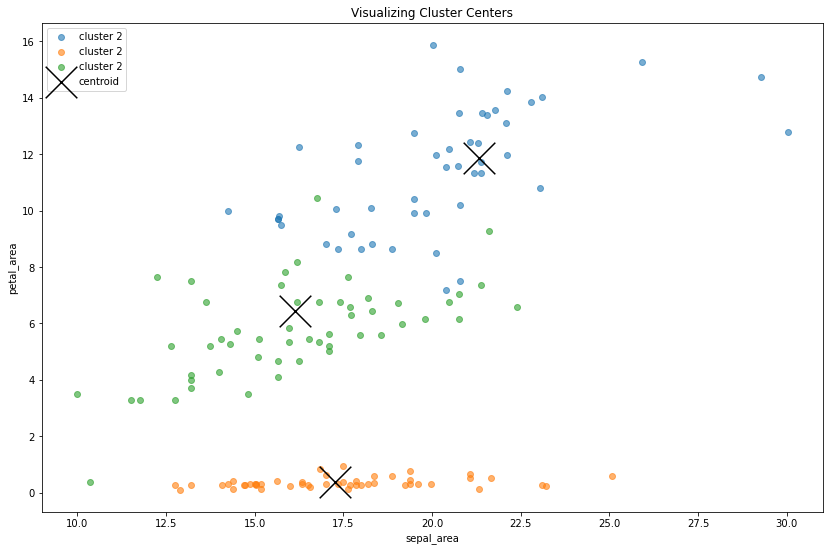

In [46]:
# visualize clusters 

plt.figure(figsize=(14, 9))

for cluster, subset in df.groupby('cluster'):
    plt.scatter(subset.sepal_area, subset.petal_area, label='cluster ' + str(cluster2), alpha=.6)

centroids.plot.scatter(y='petal_area', x='sepal_area', c='black', marker='x', s=1000, ax=plt.gca(), label='centroid')

plt.legend()
plt.xlabel('sepal_area')
plt.ylabel('petal_area')
plt.title('Visualizing Cluster Centers')

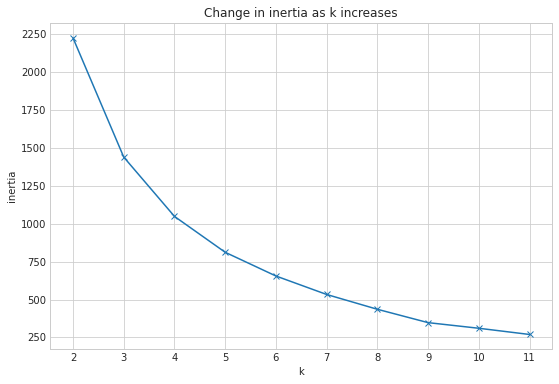

In [47]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')


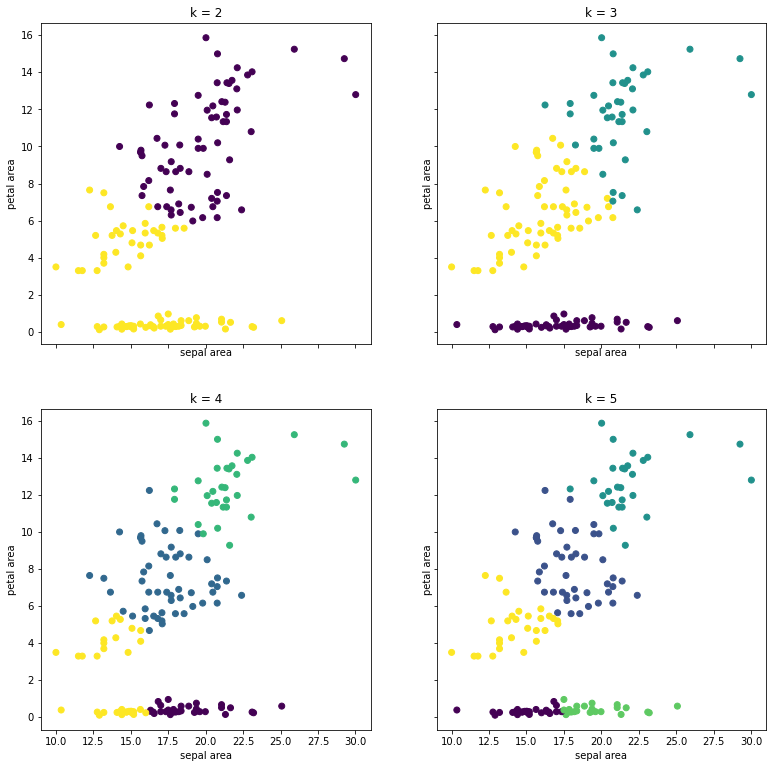

In [48]:
fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k).fit(X).predict(X)
    ax.scatter(X.sepal_area, X.petal_area, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='sepal area', ylabel='petal area')


# Mall Dataset

In [49]:
sql_query = '''
SELECT *
FROM customers'''

df = pd.read_sql(sql_query, get_db_url('mall_customers'))

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     200 non-null    int64 
 1   gender          200 non-null    object
 2   age             200 non-null    int64 
 3   annual_income   200 non-null    int64 
 4   spending_score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [51]:
# designate features to create clusters with
X = df[['annual_income', 'age']]

In [53]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

kmeans.predict(X)

array([3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 0, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 0, 3, 3, 3, 3, 3, 0, 3, 0, 3, 0, 3, 3, 3, 3, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2,
       0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2,
       2, 0, 0, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0,
       0, 2, 2, 2, 2, 2, 0, 4, 4, 4, 2, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4,
       2, 4, 2, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [54]:
df['cluster'] = kmeans.predict(X)

In [55]:
# average values of each feature for each cluster 
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
centroids

,annual_income,age
0,48.480000,56.620000
1,109.700000,36.600000
2,59.483871,25.064516
3,27.243902,29.536585
4,78.155172,38.258621


In [56]:
df.groupby('cluster')['annual_income', 'age'].mean()


/var/folders/f1/m4_s2k_97xng0khbnvxb1jbw0000gn/T/ipykernel_8015/3334317348.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('cluster')['annual_income', 'age'].mean()


,annual_income,age
cluster,,
0,48.480000,56.620000
1,109.700000,36.600000
2,59.483871,25.064516
3,27.243902,29.536585
4,78.155172,38.258621


Text(0.5, 1.0, 'Visualizing Cluster Centers')

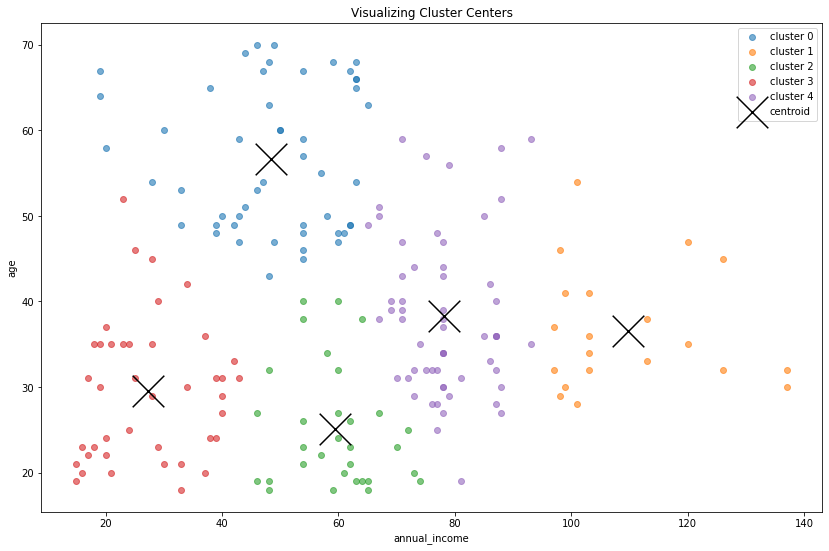

In [59]:
# visualize clusters 

plt.figure(figsize=(14, 9))

for cluster, subset in df.groupby('cluster'):
    plt.scatter(subset.annual_income, subset.age, label='cluster ' + str(cluster), alpha=.6)

centroids.plot.scatter(y='age', x='annual_income', c='black', marker='x', s=1000, ax=plt.gca(), label='centroid')

plt.legend()
plt.xlabel('annual_income')
plt.ylabel('age')
plt.title('Visualizing Cluster Centers')

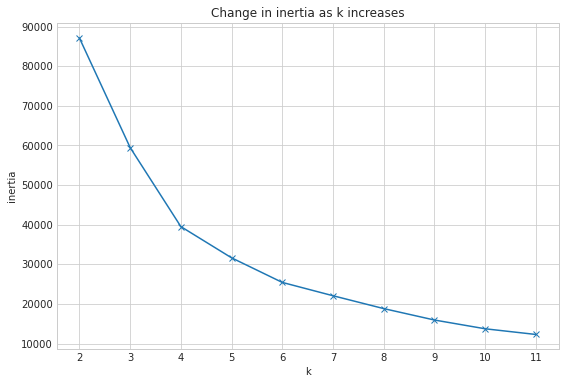

In [60]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

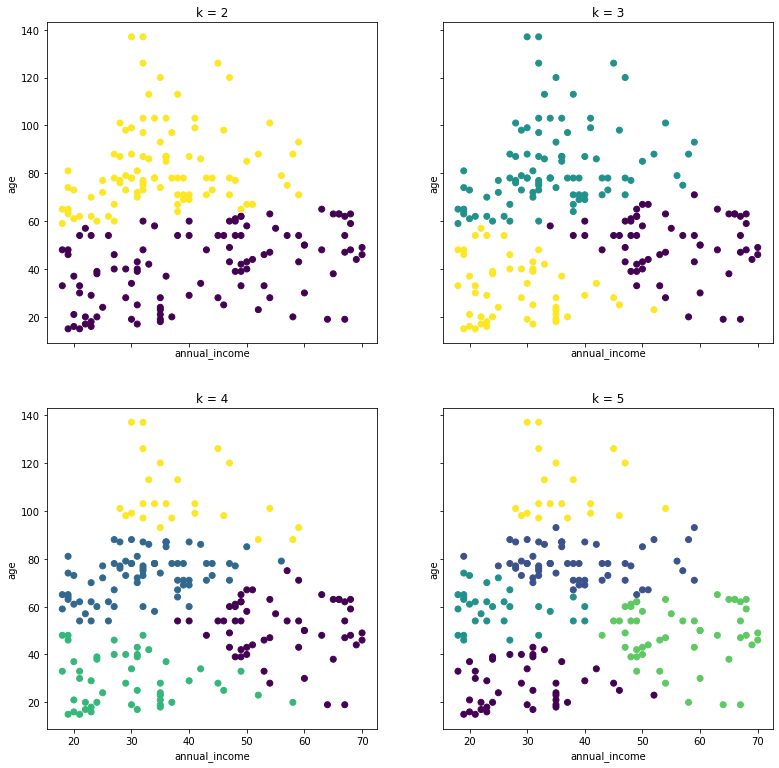

In [62]:
fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k).fit(X).predict(X)
    ax.scatter(X.age, X.annual_income, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='annual_income', ylabel='age')